In [85]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
import pandas as pd

In [86]:
#reading in the train and test data using pandas
dataset1_train = pd.read_csv('dataset1_train.csv')
dataset2_train = pd.read_csv('dataset2_train.csv')
dataset3_train = pd.read_csv('dataset3_train.csv')
dataset1_test = pd.read_csv('dataset1_test.csv')
dataset2_test = pd.read_csv('dataset2_test.csv')
dataset3_test = pd.read_csv('dataset3_test.csv')

In [109]:
# convert panda dataframes to numpy arrays
ds1_train = dataset1_train.values
ds2_train = dataset2_train.values
ds3_train = dataset3_train.values
ds1_test = dataset1_test.values
ds2_test = dataset2_test.values
ds3_test = dataset3_test.values

#extracting the features and the lables of each ds 
ds1_train_features = ds1_train[:, :-1] #getting the x and y axis 

# print(ds1_train_features.shape)

ds1_train_label = ds1_train[:, -1] #getting the class labels 

# print(ds1_train_label.shape)

ds2_train_features = ds2_train[:, :-1] #getting the x and y axis 

# print(ds2_train_features.shape)

ds2_train_label = ds2_train[:, -1] #getting the class labels 

# print(ds2_train_label.shape)

ds3_train_features = ds3_train[:, :-1] #getting the x and y axis 

# print(ds3_train_features.shape)

ds3_train_label = ds3_train[:, -1] #getting the class labels 

# print(ds2_train_label.shape)

#extracting the features and the lables of each ds 
ds1_test_features = ds1_test[:, :-1] #getting the x and y axis 

# print(ds1_train_features.shape)

ds1_test_label = ds1_test[:, -1] #getting the class labels 

# print(ds1_train_label.shape)

ds2_test_features = ds2_test[:, :-1] #getting the x and y axis 

# print(ds2_train_features.shape)

ds2_test_label = ds2_test[:, -1] #getting the class labels 

# print(ds2_train_label.shape)

ds3_test_features = ds3_test[:, :-1] #getting the x and y axis 

# print(ds3_train_features.shape)

ds3_test_label = ds3_test[:, -1] #getting the class labels 

# print(ds2_train_label.shape)

In [114]:
def perceptron_learning(x, labels, w_int=np.array([1.0,1.0,1.0]), eta=1, max_iterations=1000):
    """
    Implements the batch gd perceptron learning algorithm.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_int: Initial weights as a numpy array. Defaults to numpy.array([1.0,1.0,1.0]).
        eta: Learning rate as a float. Defaults to 1.
        max_iterations: Maximum number of iterations as an int. 
                        Defaults to 1000(here refer to epochs for batch gd).

    Returns:
        w_hats: Weights after each iteration.
                The array size should be (epochs, D+1) when augmented
        Js: Criterion function values after each iteration, size: (epochs, )
        error_rates: Misclassification rates after each iteration, size: (epochs, )
    """
    
    w_hats = w_int
    accuracy = []
    err_rates = []
    Js = [] #stores the total num of misclassifications
    
    bias = np.ones((x.shape[0], 1))
    labels == 1.0
    labels = np.where(labels, -1,1)
    x = np.hstack((bias, x))
    
    for i in range(max_iterations):
        pred = np.sign(np.dot(x, w_hats))
        err = np.mean(pred != labels)
        err_rates.append(err) 
        acc = np.mean(pred == labels)
        accuracy.append(acc)
        
        J_w = np.sum(np.maximum(0, np.dot(x, w_hats) * labels))
        Js.append(J_w)
        
        misclassifications = np.where(pred != labels)[0]
        
        if len(misclassifications) == 0:
            print("correct classification - program can stop")
            break; 
            
        for i in misclassifications: 
            w_hats +=eta * labels[i] * x[i]
            
        if(i == max_iterations-1):
            print("max 1000 iterations have been achieved")
            break; 
    
    return w_hats, accuracy, Js, err_rates

In [137]:
def plot_linear_learning(x, labels, w_hat, Js, error_rates):
    """
    Plot training curve, and visualize the decision boundry
    Args:
        x: (N, D) data array, non-augmented format
        labels:  lengnth array with labels 1, 2
        w_hat: final learned weights.
        Js: length N_epochs of Loss values (the learning curve)
        error_rates: length N_epochs of misclassification rates as the algorithm learned
    """
    N_epochs = len(Js)
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    LIMIT = np.max(x)
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
   
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] )
                                     / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')

    ## Learning curve
    epochs = np.arange(N_epochs)
    ax[1].plot(epochs, Js, marker='o', color='green', label='J (Loss)')
    # add second y-axis for the metric of error rate: https://pythonguides.com/matplotlib-two-y-axes/
    ax2 = ax[1].twinx() 
    ax2.plot(epochs, error_rates, marker='x', color='purple', label='Error Rate')
    ax[1].set_ylabel('J (Loss)', color = 'green') 
    ax[1].tick_params(axis ='y', labelcolor = 'green') 
    ax2.set_ylabel('Error rate (%)', color = 'purple') 
    ax2.tick_params(axis ='y', labelcolor = 'purple') 

    # ax[1].set_xlabel('epoch')
    # ax[1].set_ylabel('J (Loss)')
    ax2.set_ylabel('error rate (%)')
    ax[0].legend()
    ax[1].grid(':')


In [90]:
def perceptron_testing(x, labels, w_hat):
    '''
    Implements the perceptron testing.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_hat: final learned weights as a numpy array.
    Returns:
        error_rates: Misclassification rates.
        
    '''
    
    ########################
    # your code comes here
    ########################
    
    pred = np.sign(np.dot(x, w_hat))
    bias = np.ones((x.shape[0], 1))
    labels == 1.0
    labels = np.where(labels, -1, 1)
    x = np.hstack((bias, x))
    err = np.mean(pred != labels)
    acc = np.mean(pred == labels)
    
    return err, acc


In [91]:
 def plot_linear_testing(x, labels, w_hat):
    """
    Visualize the decision boundary of testing sets
    Args:
    x: (N, D) data array, non-augmented format
    labels:  lengnth array with labels 1, 2
    w_hat: final learned weights as a numpy array.
    """
  
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    
    LIMIT = np.max(x)

    
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] ) 
                                    / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')

In [127]:
# perceptron learning to dataset 1 - train
print("ds_1_train")
ds1_train_weight, ds1_train_acc, ds1_train_err, error_rates_dataset1 = perceptron_learning(ds1_train_features, ds1_train_label, w_int=np.array([1.0, 1.0, 1.0]), eta = 1)
# print("ds_2_train")
# ds2_train_weight, ds2_train_acc, ds2_train_err, error_rates_dataset2 = perceptron_learning(ds2_train_features, ds2_train_label)
# print("ds_3_train")
# ds3_train_weight, ds3_train_acc, ds3_train_err, error_rates_dataset3 = perceptron_learning(ds2_train_features, ds2_train_label)


ds_1_train
correct classification - program can stop


In [128]:
print("ds_1_train")
print("ds1_train_weight", ds1_train_weight)
print("ds1_train_acc", ds1_train_acc)
print("ds1_train_err", ds1_train_err)
print("error_rates_dataset1", error_rates_dataset1)
print("Classification Accuracy", ds1_train_acc[len(ds1_train_acc)-1]*100.0, "%")

ds_1_train
ds1_train_weight [ 32.         -73.56105272 -80.01591831]
ds1_train_acc [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]
ds1_train_err [15141.277713290574, 15175.846981366554, 15210.416249442535, 15244.985517518513, 15279.554785594497, 15314.124053670477, 15365.78506404616]
error_rates_dataset1 [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0]
Classification Accuracy 100.0 %


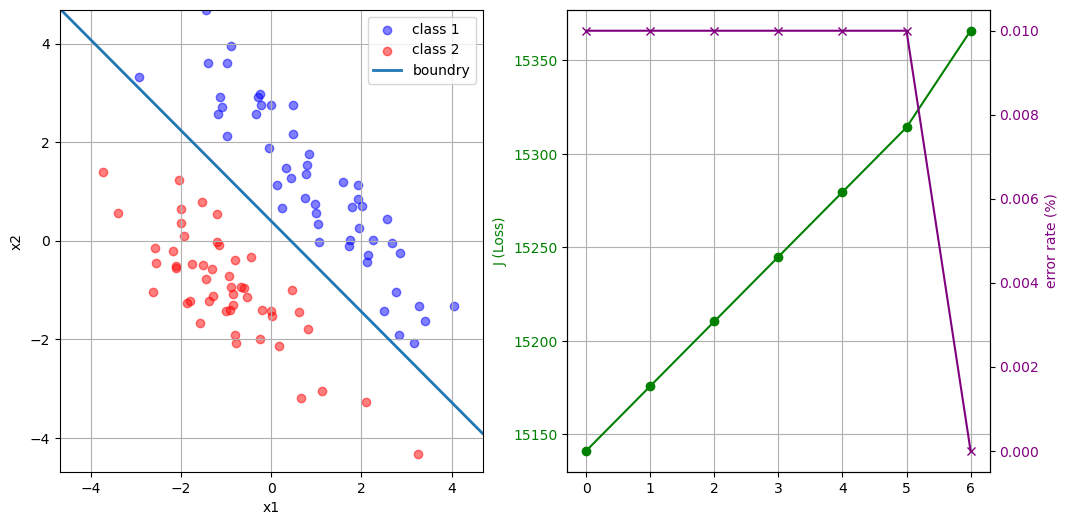

In [138]:
plot_linear_learning(ds1_train_features, ds1_train_label, ds1_train_weight, ds1_train_err, error_rates_dataset1)

In [139]:
err1, acc1 = perceptron_testing(ds1_test_features, ds1_test_label, ds1_train_weight)

In [140]:
print("err1", err1)
print("acc1", acc1)

err1 0.5
acc1 0.5


accuracy of test file 1 50.0 %
Plots below for the test file 1: 


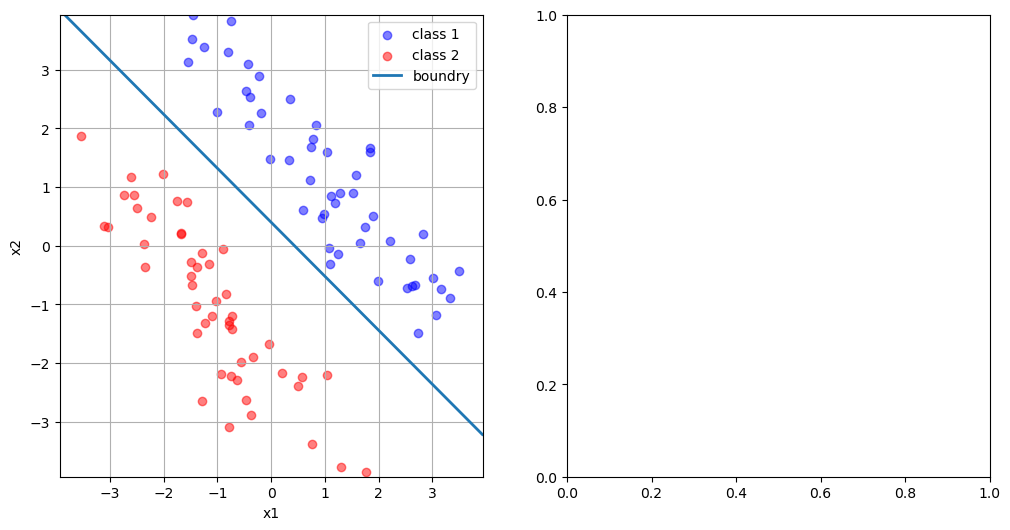

In [141]:
print("accuracy of test file 1", acc1*100, "%")

print("Plots below for the test file 1: ")

plot_linear_testing(ds1_test_features, ds1_test_label, ds1_train_weight)

ds_2_train
correct classification - program can stop
ds_2_train
ds2_train_weight [  16.            5.08575051 -229.46004326]
ds2_train_acc [0.29, 0.65, 0.73, 0.97, 0.94, 0.86, 0.76, 0.77, 0.96, 0.94, 0.9, 0.93, 0.92, 0.95, 0.92, 0.93, 0.92, 0.95, 0.92, 0.94, 0.92, 0.95, 0.92, 0.93, 0.92, 0.96, 0.96, 0.98, 0.96, 0.96, 0.96, 0.98, 0.95, 0.93, 0.94, 0.92, 0.96, 0.96, 0.98, 0.96, 0.96, 0.96, 0.98, 0.95, 0.93, 0.94, 0.92, 0.95, 0.93, 0.95, 0.96, 0.98, 0.97, 0.96, 0.98, 0.96, 0.96, 0.96, 0.98, 0.95, 0.95, 0.98, 0.96, 0.96, 0.96, 1.0]
ds2_train_err [85.13834087520551, 48395.84112617774, 28272.464359431353, 12077.42833431662, 11088.869175105481, 17312.027721640123, 11365.679014960271, 31987.725085966227, 16958.255156701678, 15046.178972645572, 20771.47807845077, 15160.223171202024, 20859.77179232313, 16014.344839020234, 20371.128454444268, 15978.564253280696, 21812.192947447922, 16858.493886380274, 21323.54960956906, 16802.730597617163, 22200.22450523813, 17405.95585424733, 21711.581167359276,

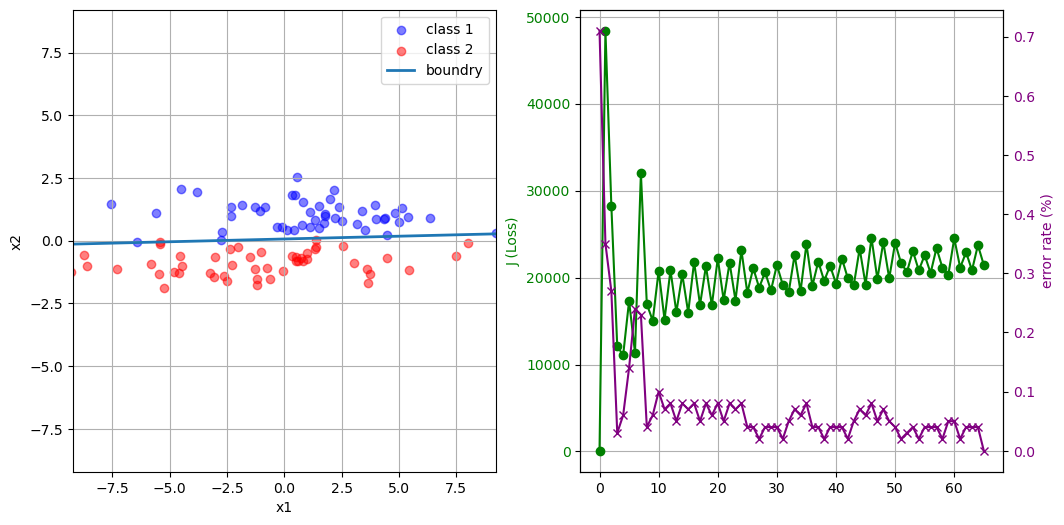

In [142]:
print("ds_2_train")
ds2_train_weight, ds2_train_acc, ds2_train_err, error_rates_dataset2 = perceptron_learning(ds2_train_features, ds2_train_label, w_int=np.array([1.0, 1.0, 1.0]), eta = 1)

print("ds_2_train")
print("ds2_train_weight", ds2_train_weight)
print("ds2_train_acc", ds2_train_acc)
print("ds2_train_err", ds2_train_err)
print("error_rates_dataset2", error_rates_dataset2)
print("Classification Accuracy", ds2_train_acc[len(ds2_train_acc)-1]*100.0, "%")

plot_linear_learning(ds2_train_features, ds2_train_label, ds2_train_weight, ds2_train_err, error_rates_dataset2)

error calc + accuracy
err2 0.53
accuracy of test file 2 47.0 %
Plots below for the test file 2: 


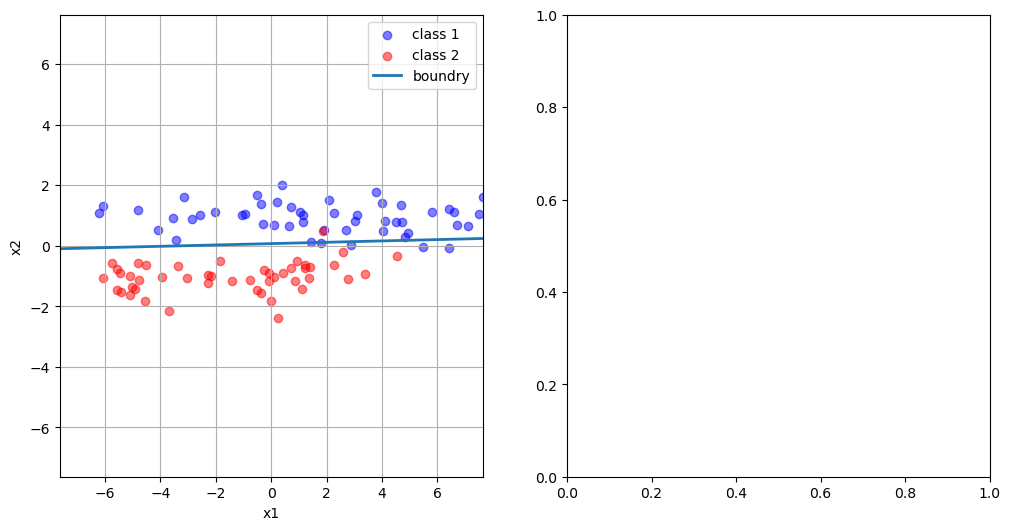

In [143]:
print("error calc + accuracy")
err2, acc2 = perceptron_testing(ds2_test_features, ds2_test_label, ds2_train_weight)
print("err2", err2)
print("accuracy of test file 2", acc2*100, "%")

print("Plots below for the test file 2: ")

plot_linear_testing(ds2_test_features, ds2_test_label, ds2_train_weight)

ds_3_train
ds_3_train
ds3_train_weight [ 82.         -28.61804405  -7.51658683]
ds3_train_acc [0.36, 0.67, 0.69, 0.76, 0.5, 0.68, 0.74, 0.5, 0.68, 0.73, 0.5, 0.68, 0.74, 0.5, 0.68, 0.74, 0.5, 0.68, 0.73, 0.5, 0.69, 0.74, 0.48, 0.69, 0.75, 0.48, 0.69, 0.75, 0.48, 0.69, 0.75, 0.48, 0.69, 0.76, 0.48, 0.69, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.48, 0.69, 0.76, 0.47, 0.7, 0.76, 0.49, 0.7, 0.75, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.47, 0.7, 0.76, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.77, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.48, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.71, 0.77, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.71, 0.77, 0.49, 0.7, 0.76, 0.49, 0.7, 0.77, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.77, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.71, 0.78, 0.49, 0.7, 0.76, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.49, 0.7,

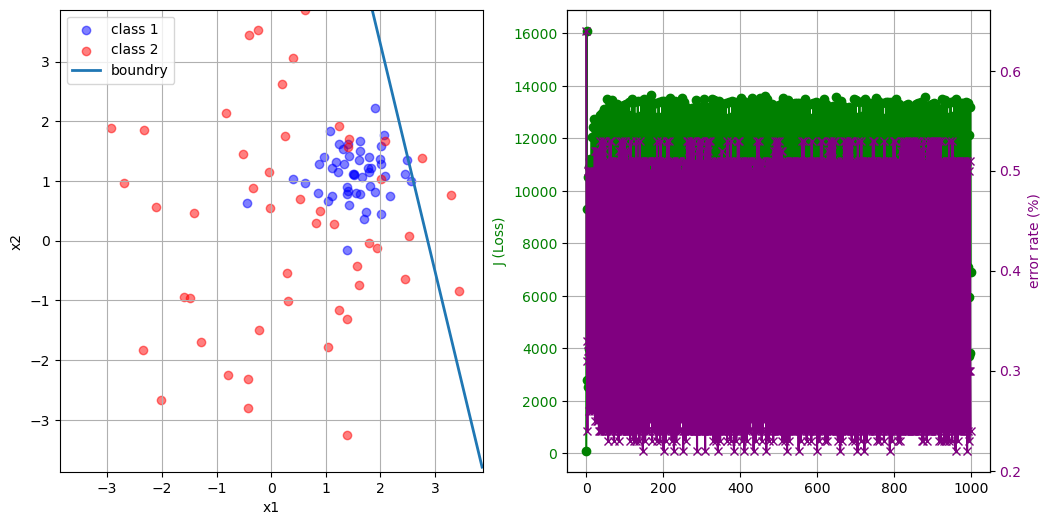

In [144]:
print("ds_3_train")
ds3_train_weight, ds3_train_acc, ds3_train_err, error_rates_dataset3 = perceptron_learning(ds3_train_features, ds3_train_label, w_int=np.array([1.0, 1.0, 1.0]), eta = 1)

print("ds_3_train")
print("ds3_train_weight", ds3_train_weight)
print("ds3_train_acc", ds3_train_acc)
print("ds3_train_err", ds3_train_err)
print("error_rates_dataset3", error_rates_dataset3)
print("Classification Accuracy", ds3_train_acc[len(ds3_train_acc)-1]*100.0, "%")

plot_linear_learning(ds3_train_features, ds3_train_label, ds3_train_weight, ds3_train_err, error_rates_dataset3)

error calc + accuracy
err3 0.21
accuracy of test file 3 79.0 %
Plots below for the test file 3: 


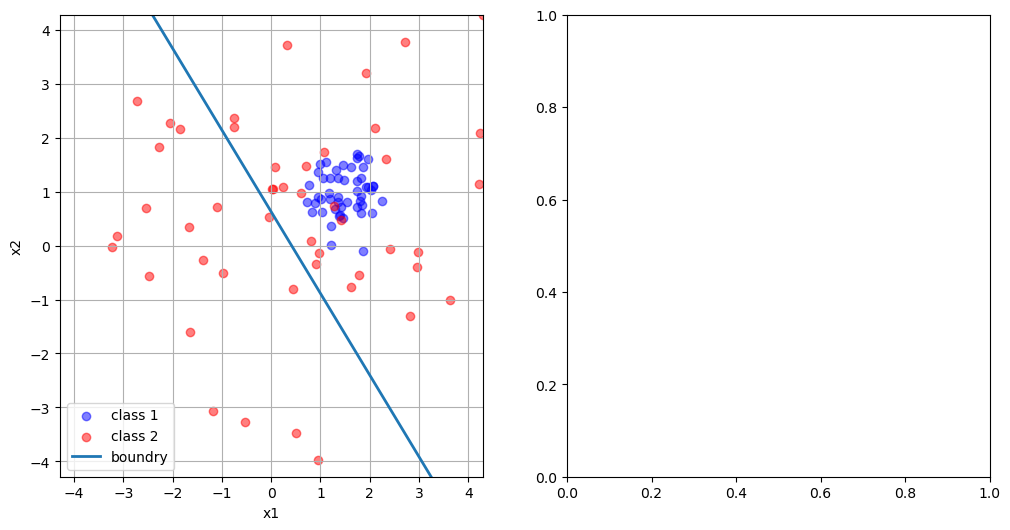

In [121]:
print("error calc + accuracy")
err3, acc3 = perceptron_testing(ds3_test_features, ds3_test_label, ds3_train_weight)
print("err3", err3)
print("accuracy of test file 3", acc3*100, "%")

print("Plots below for the test file 3: ")

plot_linear_testing(ds3_test_features, ds3_test_label, ds3_train_weight)

ds_1_train
correct classification - program can stop
ds_1_train
ds2_train_weight [  -69.          -937.02486112 -1006.39918235]
ds2_train_acc [0.07, 1.0]
ds2_train_err [1.6730632193477704, 194410.19945354544]
error_rates_dataset2 [0.93, 0.0]
Classification Accuracy 100.0 %


ValueError: x and y must have same first dimension, but have shapes (2,) and (200,)

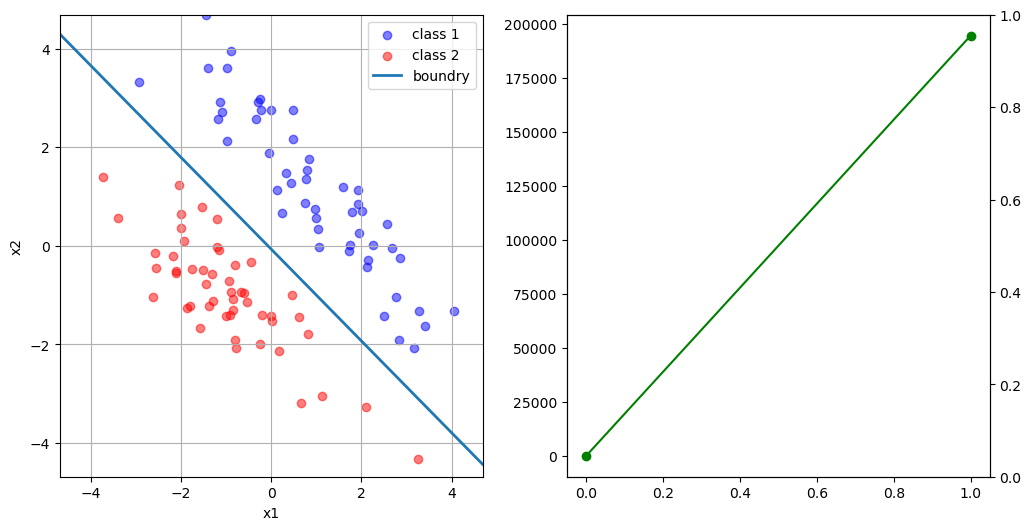

In [132]:
#ETA 10:

print("ds_1_train")
ds1_train_weight1, ds1_train_acc1, ds1_train_err1, error_rates_dataset1_0 = perceptron_learning(ds1_train_features, ds1_train_label, w_int=np.array([1.0, 1.0, 1.0]), eta = 10)

print("ds_1_train")
print("ds2_train_weight", ds1_train_weight1)
print("ds2_train_acc", ds1_train_acc1)
print("ds2_train_err", ds1_train_err1)
print("error_rates_dataset2", error_rates_dataset1_0)
print("Classification Accuracy", ds1_train_acc1[len(ds1_train_acc1)-1]*100.0, "%")

plot_linear_learning(ds1_train_features, ds1_train_label, ds1_train_weight1, ds1_train_err1, error_rates_dataset1_0)


error calc + accuracy
err1 0.5
accuracy of test file 1 50.0 %
Plots below for the test file 1: 


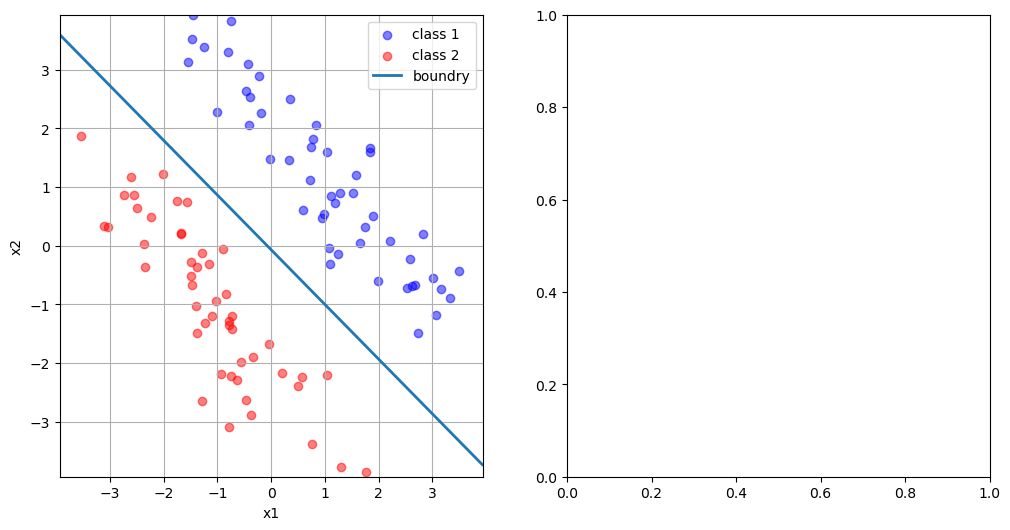

In [136]:
print("error calc + accuracy")
err1_0, acc1_0 = perceptron_testing(ds1_test_features, ds1_test_label, ds1_train_weight1)
print("err1", err1_0)
print("accuracy of test file 1", acc1_0*100, "%")

print("Plots below for the test file 1: ")

plot_linear_testing(ds1_test_features, ds1_test_label, ds1_train_weight1)

ds_2_train
correct classification - program can stop
ds_2_train
ds2_train_weight [  131.            50.27689559 -2401.79487525]
ds2_train_acc [0.29, 0.65, 0.73, 0.96, 0.9, 0.83, 0.82, 0.79, 0.96, 0.95, 0.95, 0.92, 0.93, 0.92, 0.95, 0.92, 0.93, 0.92, 0.96, 0.96, 0.98, 0.95, 0.92, 0.93, 0.92, 0.96, 0.96, 0.98, 0.98, 0.96, 0.96, 0.98, 0.95, 0.92, 0.94, 0.92, 0.95, 0.93, 0.94, 0.92, 0.95, 0.93, 0.95, 0.95, 0.96, 0.96, 0.98, 0.96, 0.96, 0.99, 0.98, 0.96, 0.96, 0.98, 0.95, 0.94, 0.95, 0.94, 0.95, 0.94, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.99, 0.98, 0.96, 0.96, 0.98, 0.96, 0.96, 0.98, 0.96, 0.96, 0.96, 0.99, 0.98, 0.97, 0.96, 0.97, 0.96, 0.99, 0.98, 0.96, 0.96, 0.99, 0.96, 0.96, 1.0]
ds2_train_err [85.13834087520551, 486515.6511124109, 285298.5032993212, 122761.48463189886, 107487.57556051575, 205943.80351882832, 118818.59342708993, 284872.9017250626, 153642.76257916607, 183155.40969741327, 152355.87821184698, 196105.36373079408, 152066.7923974474, 210516.00866083062, 160797.36868544726, 205

ValueError: x and y must have same first dimension, but have shapes (46,) and (9100,)

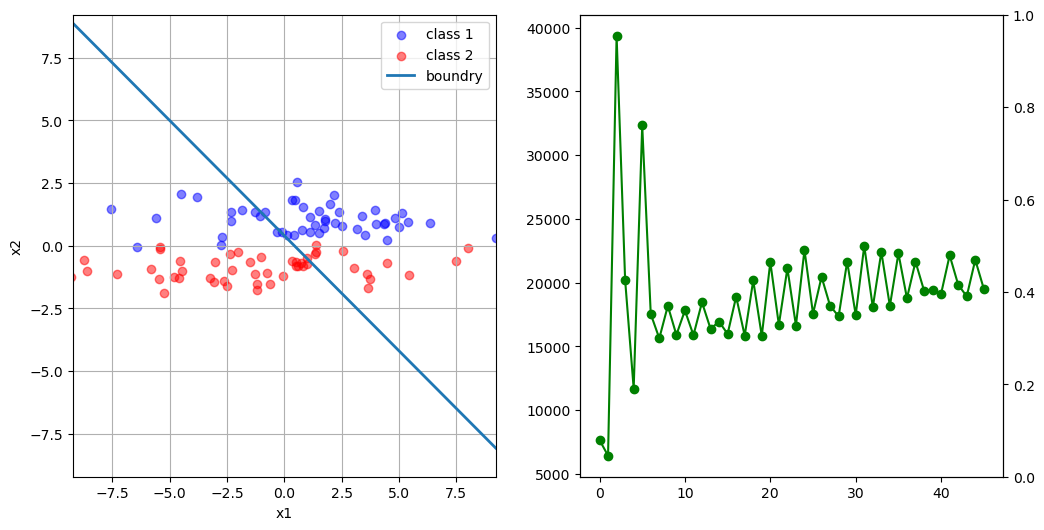

In [135]:
print("ds_2_train")
ds2_train_weight2, ds2_train_acc2, ds2_train_err2, error_rates_dataset2_0 = perceptron_learning(ds2_train_features, ds2_train_label, w_int=np.array([1.0, 1.0, 1.0]), eta = 10)

print("ds_2_train")
print("ds2_train_weight", ds2_train_weight2)
print("ds2_train_acc", ds2_train_acc2)
print("ds2_train_err", ds2_train_err2)
print("error_rates_dataset2", error_rates_dataset2_0)
print("Classification Accuracy", ds2_train_acc[len(ds2_train_acc)-1]*100.0, "%")

plot_linear_learning(ds2_train_features, ds2_train_label, ds2_train_weight, ds2_train_err, error_rates_dataset2_0)

error calc + accuracy
err2 0.52
accuracy of test file 2 48.0 %
Plots below for the test file 1: 


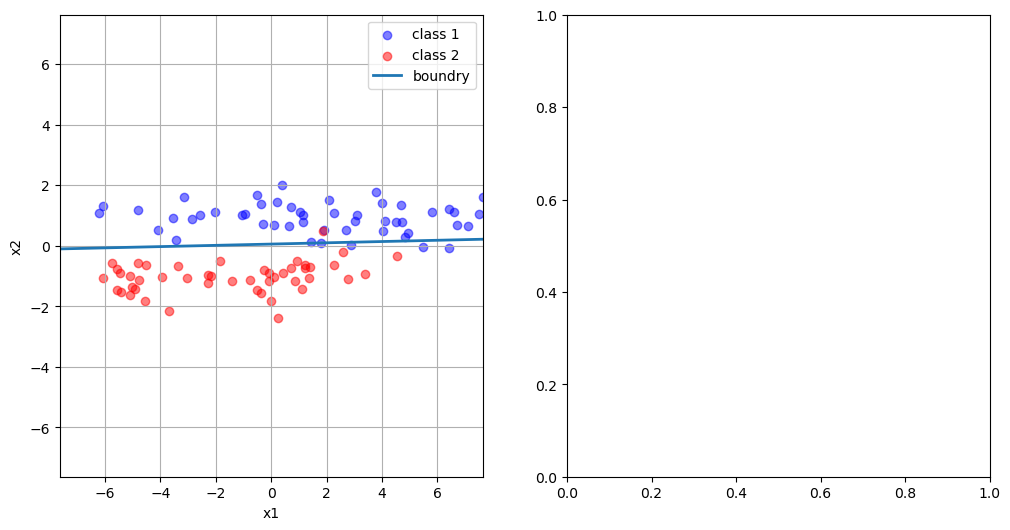

In [148]:
print("error calc + accuracy")
err2_0, acc2_0 = perceptron_testing(ds2_test_features, ds2_test_label, ds2_train_weight2)
print("err2", err2_0)
print("accuracy of test file 2", acc2_0*100, "%")

print("Plots below for the test file 1: ")

plot_linear_testing(ds2_test_features, ds2_test_label, ds2_train_weight2)

ds_3_train
ds_3_train
ds3_train_weight [ 841.         -268.9341182   -76.82444668]
ds3_train_acc [0.36, 0.67, 0.69, 0.76, 0.5, 0.68, 0.74, 0.5, 0.68, 0.74, 0.5, 0.68, 0.74, 0.5, 0.68, 0.73, 0.5, 0.68, 0.73, 0.49, 0.69, 0.74, 0.49, 0.69, 0.75, 0.48, 0.69, 0.75, 0.48, 0.69, 0.75, 0.48, 0.69, 0.75, 0.48, 0.69, 0.76, 0.47, 0.7, 0.76, 0.48, 0.69, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.48, 0.7, 0.76, 0.47, 0.7, 0.76, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.71, 0.77, 0.49, 0.7, 0.76, 0.5, 0.7, 0.78, 0.49, 0.7, 0.76, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.47, 0.7, 0.76, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.7, 0.78, 0.49, 0.7, 0.76, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.47, 0.7, 0.76, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.5, 0.7, 0.77, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7, 0.77, 0.47, 0.7, 0.76, 0.49, 0.7, 0.76, 0.49, 0.7,

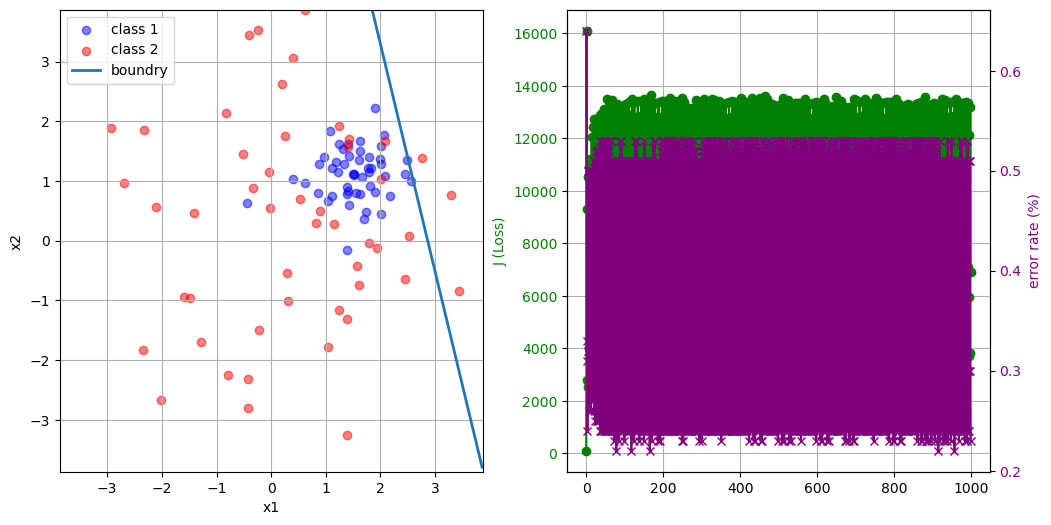

In [153]:
print("ds_3_train")
ds3_train_weight3, ds3_train_acc3, ds3_train_err3, error_rates_dataset3_0 = perceptron_learning(ds3_train_features, ds3_train_label, w_int=np.array([1.0, 1.0, 1.0]), eta = 10)

print("ds_3_train")
print("ds3_train_weight", ds3_train_weight3)
print("ds3_train_acc", ds3_train_acc3)
print("ds3_train_err", ds3_train_err3)
print("error_rates_dataset3", error_rates_dataset3_0)
print("Classification Accuracy", ds3_train_acc[len(ds3_train_acc)-1]*100.0, "%")

plot_linear_learning(ds3_train_features, ds3_train_label, ds3_train_weight, ds3_train_err, error_rates_dataset3_0)

error calc + accuracy
err3 0.95
accuracy of test file 3 5.0 %
Plots below for the test file 3: 


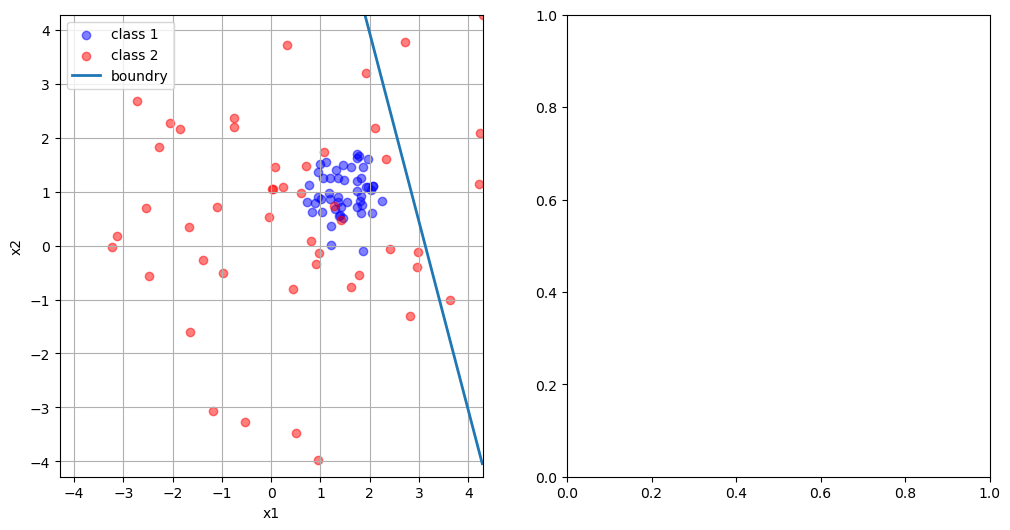

In [152]:
print("error calc + accuracy")
err3_0, acc3_0 = perceptron_testing(ds3_test_features, ds3_test_label, ds3_train_weight3)
print("err3", err3_0)
print("accuracy of test file 3", acc3_0*100, "%")

print("Plots below for the test file 3: ")

plot_linear_testing(ds3_test_features, ds3_test_label, ds3_train_weight3)

In [ ]:
# ETA=1: 

# Comment on the performance of perceptron on the 3 datasets 
# (that is, compare across the 3 datasets and explain similarities and differences).

# # In the first datasets, the boundary line is merely down the middle,
# with class 1 and class 2 dispersed on the top and the bottom. 
# For dataset 1, the J(loss) grows exponentially whilst the error rate is 
# stagnant and drastically decreasing. The boundary line is at the same 
# place for the first data test set, but the data is more sparse between 
# class 1 and class 2. For dataset 2, the data is sparsed horizontally, 
# the boundary line is vertical, and the error rate varies.
# This is very different from the first dataset, where the class 
# classifications were sparse, but in dataset 2, they are close together, 
# and so is the boundary line. Lastly, for dataset 3, the boundary line
# is on the far right of the graph, and the data of classes 1 and 2 
# is scattered across the graph and inter-mixed. 


# # ETA=10:

# # By increasing the eta, dataset 1, the output is the same, with 
# the boundary line shifting a bit to the center. 
# However, it changes for dataset 2 by the boundary 
# line being diagonal and vertical instead of the horizontal 
# boundary line that appeared with eta 1. The classification accuracy has increased 
# for dataset 3 with the increased eta. 